# Systems of Equations

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.integrate as spi

## First Order Systems

An $d$-dimensional first order system of differential equations is of the form

$$
\begin{align*}
x_0' &= f_0(x_0,\dots,x_{d-1},t) \\
x_1' &= f_1(x_0,\dots,x_{d-1},t) \\
& \ \  \vdots \\
x_{d-1}' &= f_{d-1}(x_0,\dots,x_{d-1},t)
\end{align*}
$$

Write the system as a vector equation

$$
\begin{bmatrix} x_0' \\ x_1' \\ \vdots \\ x_{d-1}' \end{bmatrix}
=
\begin{bmatrix} f_0(x_0,\dots,x_{d-1},t) \\ f_1(x_0,\dots,x_{d-1},t) \\ \vdots \\ f_{d-1}(x_0,\dots,x_{d-1},t) \end{bmatrix}
$$

Write the system in vector notation

$$
\frac{d \mathbf{x}}{dt} = \mathbf{f}(\mathbf{x},t)
$$

where $\mathbf{x}$ is a vector of $d$ unknown functions

$$
\mathbf{x}(t) = \begin{bmatrix} x_0(t) \\ x_1(t) \\ \vdots \\ x_{d-1}(t) \end{bmatrix}
\hspace{20mm}
\frac{d\mathbf{x}}{dt} = \begin{bmatrix} x_0'(t) \\ x_1'(t) \\ \vdots \\ x_{d-1}'(t) \end{bmatrix}
$$

and $\mathbf{f}$ is a vector of functions

$$
\mathbf{f}(\mathbf{x},t) = \begin{bmatrix} f_0(x_0,x_1,\dots,x_{d-1},t) \\ f_1(x_0,x_1,\dots,x_{d-1},t) \\ \vdots \\ f_{d-1}(x_0,x_1,\dots,x_{d-1},t) \end{bmatrix}
$$

For example, consider the 2-dimensional first order system of differential equations

$$
\begin{align*}
x_0' &= x_1 \\
x_1' &= x_0
\end{align*}
$$

Represent the right side of the system as a vector function

$$
\mathbf{f}(\mathbf{x},t) = \begin{bmatrix} x_1 \\ x_0 \end{bmatrix}
$$

In this example, the variable $t$ does not appear in the expression for $\mathbf{f}$ but we include it anyway because we want a standard form for first order systems. Create a Python function which represents the right hand side of the system of equations.

In [2]:
f = lambda x,t: np.array([ x[1] , x[0] ])

Plug in some values to verify that `f` returns the array $[x_1 , x_0]$ for the input $\mathbf{x} = [x_0,x_1]$.

In [3]:
f([1.,2.],0)

array([2., 1.])

In [4]:
f([-3.,2.],1)

array([ 2., -3.])

## Numerical Solutions

The function `scipy.integrate.odeint` approximates the solution of a system of first order differential equations with an initial condition:

$$
\frac{d\mathbf{x}}{dt} = \mathbf{f}(\mathbf{x},t) \ , \ \ \mathbf{x}(t_0) = \mathbf{x}_0 = \begin{bmatrix} x_0(t_0) \\ x_1(t_0) \\ \vdots \\ x_{d-1}(t_0) \end{bmatrix}
$$

The function `scipy.integrate.odeint` takes input parameters `f`, `x0` and `t` where:

* `f` is a Python function which represents the right hand side of the system $\mathbf{f}(\mathbf{x},t)$
* `x0` is the vector of initial values $\mathbf{x}(t_0) = \mathbf{x}_0$
* `t` is a NumPy array of $t$ values such that the first entry is $t_0$

The fuction `scipy.integrate.odeint` returns a NumPy array `x` such that:

* the number of rows of `x` is equal to the length of `t`
* the number of columns of `x` is equal to the dimension $d$ of the system
* the first row `x[0,:]` is the vector of initial values $\mathbf{x}(t_0) = \mathbf{x}_0$
* the row `x[n,:]` at index $n$ is the vector of approximations of the solution $\mathbf{x}(t_n)$ at time $t_n$
* the value $t_n$ is the entry `t[n]` at index $n$ in the input array `t`
* the column `x[:,i]` is the vector of approximations of the function $x_i(t)$

Given a differential equation with initial value, it is up to us to construct the input vector `t`. We need to choose a final value $t_f$ and the number of values in the input vector `t`.

## Examples

### 2D Linear System

Approximate the unique solution of the 2-dimensional first order system of differential equations

$$
\begin{align*}
x_0' &= x_0 - x_1 \\
x_1' &= 5x_0 - 3x_1
\end{align*}
$$

with initial conditions $x_0(0) = 0$, $x_1(0) = 1$. Approximate the solution over the interval $[0,5]$.

Represent the right side of the system as a vector function

$$
\mathbf{f}(\mathbf{x},t) = \begin{bmatrix}  x_0 - x_1 \\ 5x_0 - 3x_1 \end{bmatrix}
$$

Define the function `f` to represent the right side of the system of equations:

In [18]:
f = lambda x,t: np.array([ x[0] - x[1] , 5*x[0] - 3*x[1] ])

Plug in some values to verify that the function returns the vector $[x_0 - x_1, 5x_0 - 3x_1]$.

In [19]:
f([2.,1.],0)

array([1., 7.])

In [20]:
f([-4.,3.],1)

array([ -7., -29.])

Define the vector of intial values $\mathbf{x}_0 = [x_0(0),x_1(0)] = [0,1]$.

In [21]:
x0 = np.array([0.,1.])

Construct a NumPy array of $t$ values from $t_0 = 0$ to $t_f = 5$. The number of points in the array is our decision. The number of points does not change the accuracy of the results. It only changes the number of rows in the ouput matrix `x` and we need enough to plot the approximation smoothly. Let's choose $N=101$ values so that the step size between $t$ values is 0.05.

In [46]:
t = np.linspace(0,5,101)

Look at the first few values of `t`.

In [47]:
t[:5]

array([0.  , 0.05, 0.1 , 0.15, 0.2 ])

Compute the matrix of approximations of $\mathbf{x}(t)$.

In [48]:
x = spi.odeint(f,x0,t)

Look at the shape of the array `x`.

In [49]:
x.shape

(101, 2)

The row `x[n,:]` corresponds to $[x_0(t_n),x_1(t_n)]$ for value `t[n]` at index $n$ in array `t`. The column `x[:,0]` corresponds to the values of the function $x_0(t)$ and column `x[:,1]` corresponds to the values of the function $x_1(t)$. Plot the approximations:

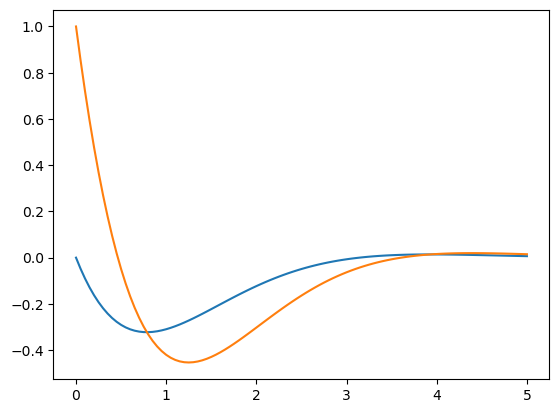

In [50]:
plt.plot(t,x[:,0],label='$x_0(t)$')
plt.plot(t,x[:,1],label='$x_1(t)$')
plt.show()

Plot the trajectory $\mathbf{x}(t) = (x_0(t),x_t(t))$.

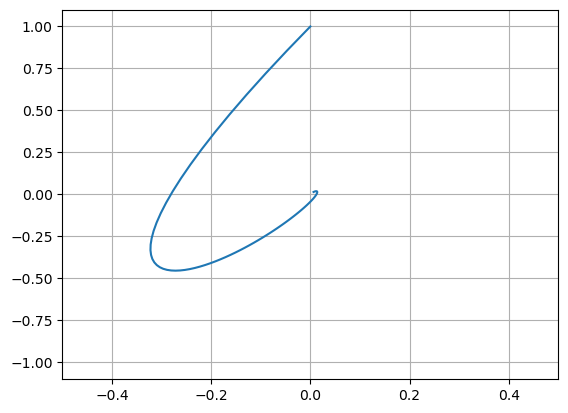

In [51]:
plt.plot(x[:,0],x[:,1])
plt.xlim([-.5,.5]), plt.ylim([-1.1,1.1]), plt.grid(True)
plt.show()

## 2D Nonlinear System

Approximate the unique solution of the 2-dimensional first order system of differential equations

$$
\begin{align*}
x_0' &= x_0^2 - x_1^2 \\
x_1' &= x_1 - x_0^2
\end{align*}
$$

with initial conditions $x_0(0) = 2$, $x_1(0) = 0$. Approximate the solution over the interval $[0,5]$.

Represent the right side of the system as a vector function

$$
\mathbf{f}(\mathbf{x},t) = \begin{bmatrix}  x_0^2 - x_1^2 \\ x_1 - x_0^2 \end{bmatrix}
$$

Define the function `f` to represent the right side of the system of equations:

/Users/patrickwalls/anaconda3/lib/python3.10/site-packages/scipy/integrate/_odepack_py.py:248: ODEintWarning: Excess work done on this call (perhaps wrong Dfun type). Run with full_output = 1 to get quantitative information.
  warnings.warn(warning_msg, ODEintWarning)


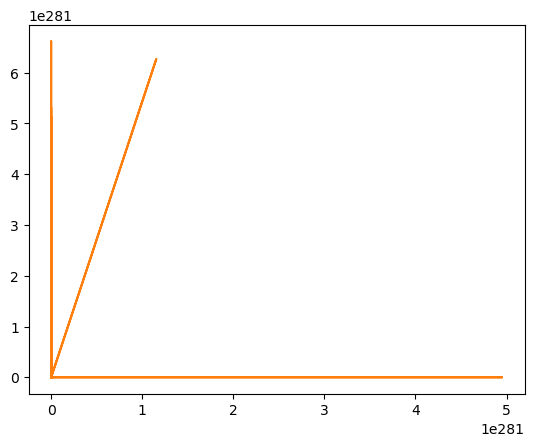

In [57]:
f = lambda x,t: np.array([ x[0]**2 - x[1]**2 , x[1] - x[0]**2 ])
t = np.linspace(0,20,501)

x0 = np.array([0.,1.])
x = spi.odeint(f,x0,t)
plt.plot(x[:,0],x[:,1])

x0 = np.array([2.,0.])
x = spi.odeint(f,x0,t)
plt.plot(x[:,0],x[:,1])

plt.show()